In [93]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

test_data  = pd.read_csv('../test_data_preprocess.csv')

compt_weights = pd.read_csv('../computed_weights/compt_weights_CoxPH_mean_repeat.csv')
compt_weights.columns
if 'Unnamed: 0' in compt_weights.columns:
    compt_weights.pop('Unnamed: 0')
    
#compt_weights = compt_weights.mul(test_data)
#compt_weights = compt_weights * test_data.mean()
compt_weights.shape

(100, 16)

In [94]:
median_up = {}
median_down = {}

for (columnName, columnData) in compt_weights.items():
    median_value = np.mean(columnData)
    if median_value > 0:
        median_up[columnName] = median_value
    else:
        median_down[columnName] = median_value

median_up = dict(sorted(median_up.items(), key=lambda item: item[1], reverse=True))
median_down = dict(
    sorted(median_down.items(), key=lambda item: item[1], reverse=True)
)

pal_up = sns.color_palette("Reds_r", n_colors=len(median_up))
pal_down = sns.color_palette("Blues", n_colors=len(median_down))
colors_up = {key: val for key, val in zip(median_up.keys(), pal_up)}
colors_down = {key: val for key, val in zip(median_down.keys(), pal_down)}
custom_pal = {**colors_up, **colors_down}

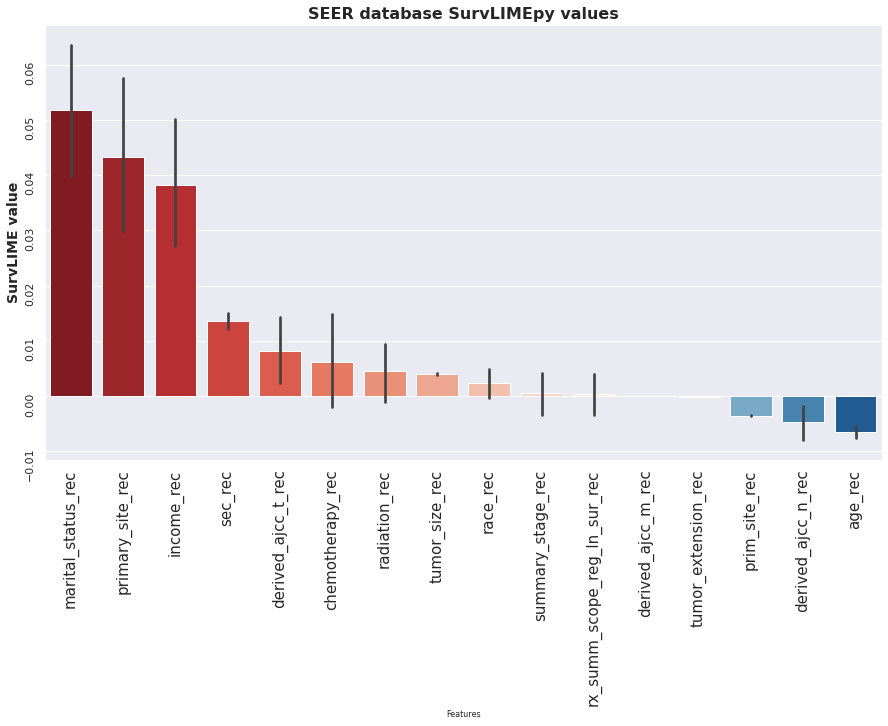

In [95]:

pru = compt_weights.copy()
pru = pru.reindex(pru.mean().sort_values(ascending=False).index, axis=1)

fig, ax= plt.subplots(1,1, figsize=(15,8), sharey=True)
ax.tick_params(labelrotation=90); ax.xaxis.grid(True)

p = sns.barplot(x="variable", y="value", data=pd.melt(pru.iloc[:]),
                                    ax=ax, palette=custom_pal) #'GnBu_r'
ax.tick_params(labelrotation=90); #ax.xaxis.grid(True)
p.set_xlabel('Features', fontsize= 8)
p.set_ylabel('SurvLIME value', fontsize= 14, fontweight='bold')
#p.set_ylim([-1, 2])# p.set_ylim([-0.01, 0.20]) OS
p.set_title(f'SEER database SurvLIMEpy values', fontsize= 16, fontweight='bold');
ax.tick_params(axis='x', which='major', labelsize=15)

### Directly plotting montecarlo weights

In [142]:
data = pd.read_csv('../computed_weights/compt_weights_RSF_montecarlo.csv')
#print(data.columns)
#data.drop('derived_ajcc_m_rec', inplace=True, axis=1)
sns.set()
median_up = {}
median_down = {}
threshold = 0
for (columnName, columnData) in data.items():
    median_value = np.median(columnData)
    if median_value > threshold:
        median_up[columnName] = median_value
    else:
        median_down[columnName] = median_value

median_up = dict(
    sorted(median_up.items(), key=lambda item: item[1], reverse=True)
)
median_down = dict(
    sorted(median_down.items(), key=lambda item: item[1], reverse=True)
)
pal_up = sns.color_palette("Reds_r", n_colors=len(median_up))
pal_down = sns.color_palette("Blues", n_colors=len(median_down))
colors_up = {key: val for key, val in zip(median_up.keys(), pal_up)}
colors_down = {key: val for key, val in zip(median_down.keys(), pal_down)}
custom_pal = {**colors_up, **colors_down}

data_reindex = data.reindex(columns=custom_pal.keys())
data_melt = pd.melt(data_reindex)

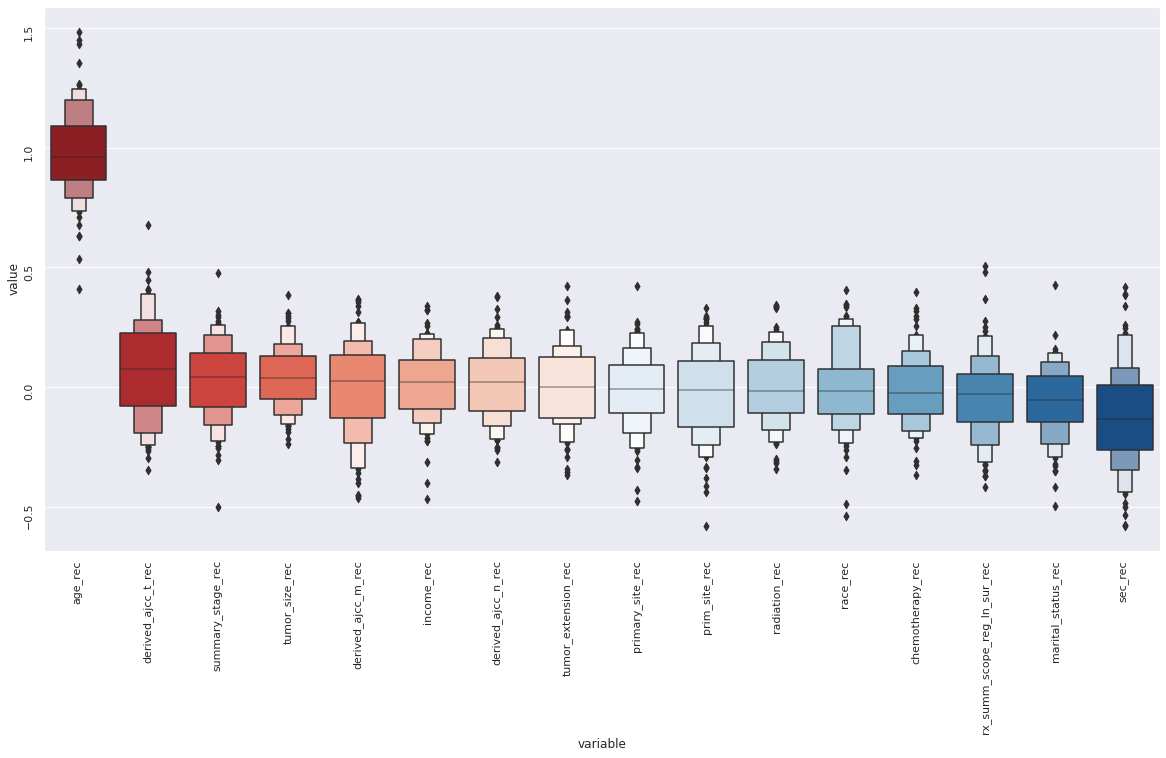

In [145]:
_, ax = plt.subplots(figsize=(20,10))
ax.tick_params(labelrotation=90)
p = sns.barplot(
    x="variable",
    y="value",
    data=data_melt,
    palette=custom_pal,
    ax=ax,
)


In [118]:
data_reindex.head()

,derived_ajcc_m_rec,tumor_extension_rec,tumor_size_rec,prim_site_rec,age_rec,sec_rec,race_rec,rx_summ_scope_reg_ln_sur_rec,derived_ajcc_n_rec,summary_stage_rec,radiation_rec,derived_ajcc_t_rec,chemotherapy_rec,primary_site_rec,income_rec,marital_status_rec
0,-4.505283e-26,6.352897e-07,0.000300,-0.000150,0.000037,-0.005864,-0.006383,-0.002339,-0.022009,-0.010330,-0.017833,-0.063599,-0.056700,-0.195766,-0.195455,-0.265570
1,-6.746562e-26,-7.789517e-06,-0.000062,-0.000149,-0.002538,-0.004248,-0.006002,-0.018639,-0.014213,-0.009095,-0.055897,-0.038355,-0.059101,-0.197324,-0.225860,-0.217845
2,-7.207152e-26,1.334668e-05,0.000017,-0.000155,-0.007780,0.000001,-0.006374,-0.013325,-0.004879,0.001880,-0.026900,-0.050847,-0.054969,-0.224515,-0.219698,-0.210421
3,-6.760463e-26,-1.450968e-06,0.000327,-0.000111,-0.000061,-0.006943,-0.014657,-0.013854,-0.012923,-0.003171,-0.009727,-0.071135,-0.057757,-0.210021,-0.233120,-0.220667
4,-6.207536e-26,-8.042515e-06,-0.000282,-0.000063,-0.005617,-0.000483,-0.005263,-0.021809,-0.016564,-0.015752,-0.031936,-0.014484,-0.031356,-0.219311,-0.211848,-0.263623


In [120]:
df

age_rec                        -7.307533e-03
tumor_size_rec                 -8.369903e-03
tumor_extension_rec            -1.478530e-02
prim_site_rec                  -1.345370e-02
sec_rec                         2.037493e-02
race_rec                       -2.330456e-03
marital_status_rec             -7.409832e-03
primary_site_rec               -3.082945e-02
derived_ajcc_t_rec             -2.600326e-02
derived_ajcc_n_rec             -8.658419e-03
derived_ajcc_m_rec              1.110223e-16
summary_stage_rec              -1.382986e-02
radiation_rec                  -1.101535e-02
chemotherapy_rec               -1.107358e-02
rx_summ_scope_reg_ln_sur_rec   -2.179583e-03
income_rec                      5.345513e-03
dtype: float64

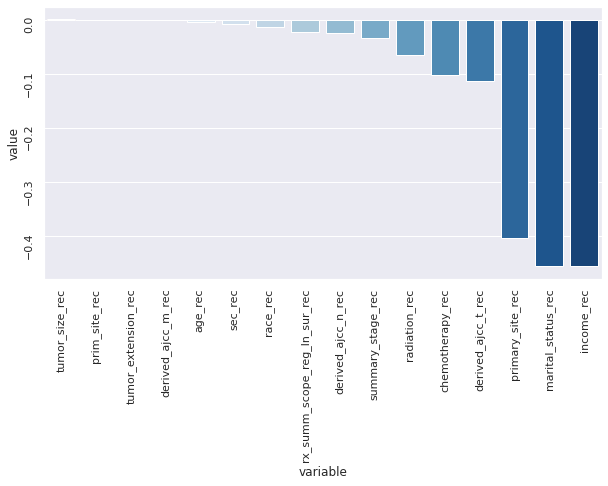

In [109]:
_, ax = plt.subplots(figsize=(10,5))
ax.tick_params(labelrotation=90)
p = sns.barplot(
    x="variable",
    y="value",
    data=data_melt,
    palette=custom_pal,
    ax=ax,
)

In [107]:
data_melt

,variable,value
0,tumor_size_rec,5.108683e-04
1,prim_site_rec,1.588652e-04
2,tumor_extension_rec,8.564733e-05
3,derived_ajcc_m_rec,-2.048517e-14
4,age_rec,-4.425317e-03
5,sec_rec,-7.665102e-03
6,race_rec,-1.352492e-02
7,rx_summ_scope_reg_ln_sur_rec,-2.236945e-02
8,derived_ajcc_n_rec,-2.546159e-02
9,summary_stage_rec,-3.317168e-02
